### M6 - W3 Assignment: Clustering
#### Luke Barry

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

***

## Data Prep

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.shape

(200, 5)

In [4]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
150,151,Male,43,78,17
91,92,Male,18,59,41
93,94,Female,40,60,40
66,67,Female,43,48,50
89,90,Female,50,58,46
67,68,Female,68,48,48
35,36,Female,21,33,81
36,37,Female,42,34,17
125,126,Female,31,70,77
155,156,Female,27,78,89


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#converting Gender to categoric
#Female = 0
#Male = 1
print(df.Gender.value_counts())
df['Gender'] = df['Gender'].astype('category').cat.codes
print(df.Gender.value_counts())

Female    112
Male       88
Name: Gender, dtype: int64
0    112
1     88
Name: Gender, dtype: int64


***

#### *Exploratory Analysis*
> Judging from the pair plot below, I decided that I would like to compare all of the features, but graphs depicting gender may be hard to interpret meaning from. I will create pairs of all the other features to later compare in graphs and use gender as a marker in all of the graphs. I also will exclude CustomerID since it doesn't provide any insight.

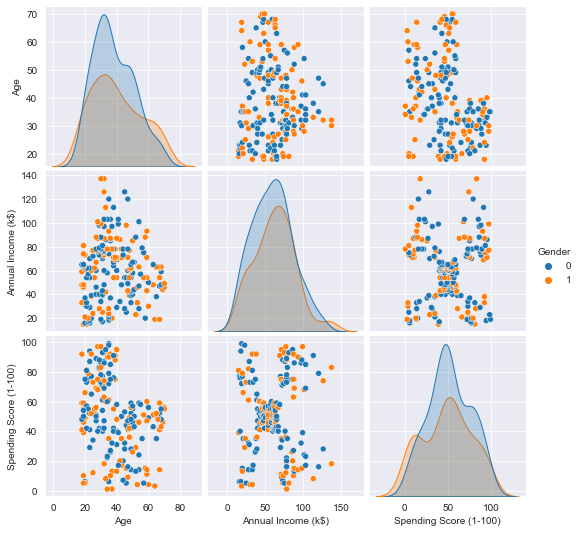

In [7]:
#pair plot
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender')
plt.show()

In [8]:
#Create pairs to inspect
pairs = [('Age', 'Annual Income (k$)'), ('Age', 'Spending Score (1-100)'), ('Annual Income (k$)', 'Spending Score (1-100)')]

***

#### *How many clusters are there in the data and why?*
> Though the intertia value graph shows that 3 may be considered optimal, but I believe extra value be derived from additional clusters. For example, the second graph below reveals a customer seghment of 18-30 year olds with exceptionally high spending scored that was not apparent with fewer clusters. I decided 5 provides a more effective segmentation.

In [9]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia value')

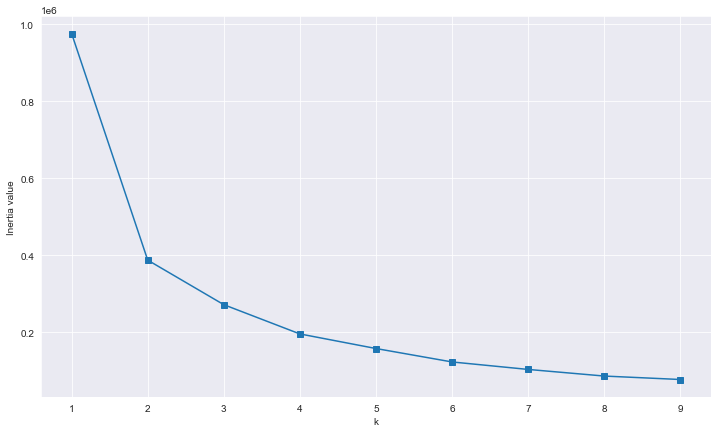

In [10]:
plt.figure(figsize=(12,7))
plt.plot(range(1, 10), inertia, marker='s')
plt.xlabel('k')
plt.ylabel('Inertia value')

***

## Cluster Analysis

In [11]:
#Creating and fitting model
normalizer = Normalizer()
kmeans = KMeans(n_clusters=5)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(df)
labels = pipeline.predict(df)

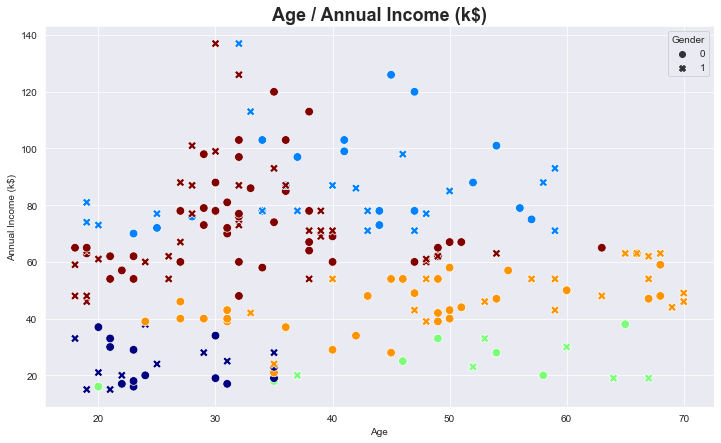

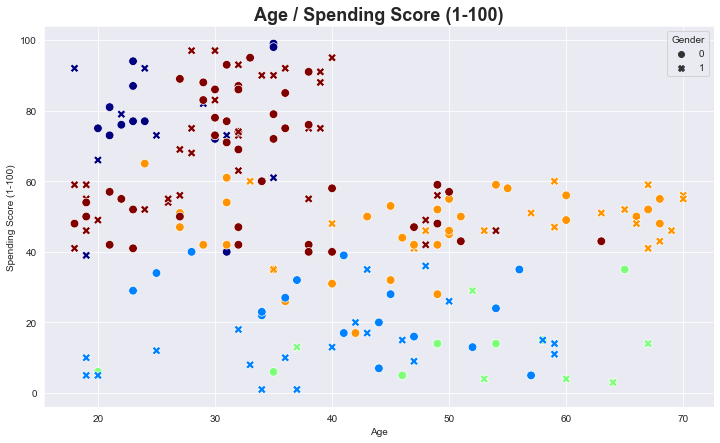

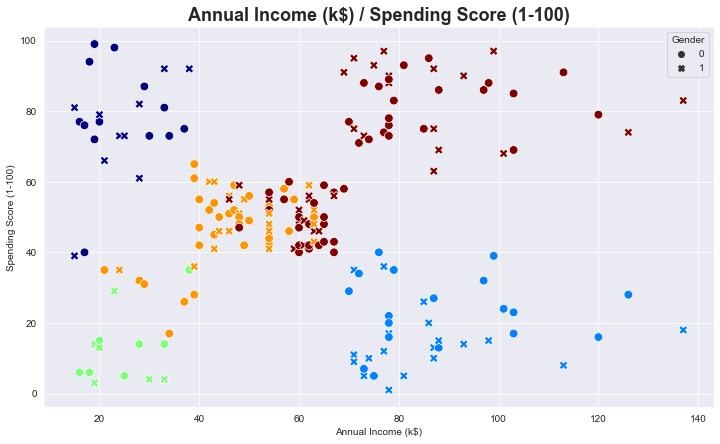

In [12]:
#plotting the clusters
def KMeans_scatter(x, y):
    "Plots a scatter plot of specified columns in a dataframe"
    plt.figure(figsize=(12,7))
    plt.title(pairs[i][0] + ' / ' + pairs[i][1], size=18, weight='bold')
    sns.scatterplot(df[x], df[y], c=labels, style=df['Gender'], s=75, cmap='jet')
#     plt.legend([],[], frameon=False)

# Iterring through desired pairs
for i in list(range(len(pairs))):
    KMeans_scatter(pairs[i][0], pairs[i][1])

### *Insights*
> - Age groups 18-40 are the mall's highest spenders. However, these two groups can be distinguished by a wide gap in their annual income.
> - 18-25(ish) year old and lower income / higher spenders are mostly female, where the older highest spenders are more evenly balanced.
> - There are 5 distinct segments that can be derived from spending score and annual income: 
><ol>
  <li>Low Income / High Spender</li>
  <li>Low Income / Low Spender</li>
  <li>Mid-Range</li>
  <li>High Income / Low Spender</li>
  <li>High Income / Low Spender</li>
</ol>